<a href="https://colab.research.google.com/github/gabrielalastra/test/blob/main/demographic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path ='/content/drive/MyDrive/Colab Notebooks/dataset/adult.data.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv(path)

In [ ]:
df.head()

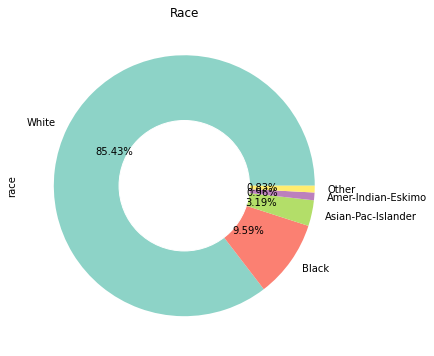

In [7]:
plt.figure(figsize=[6,6])
df['race'].value_counts().plot(kind='pie',
                                     colormap='Set3', autopct='%.2f%%')
plt.title('Race')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [8]:
#average age of men
mask = df['sex'] == 'Male'
mask = df[mask]

In [12]:
maskF = df['sex'] == 'Female'
maskF= df[maskF]

In [9]:
mask.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [15]:
print('the average age of men is: {}'.format(round(mask['age'].mean(), 1)))
print('\nthe average age of woman is: {}'.format(round(maskF['age'].mean(), 1)))

the average age of men is: 39.4

the average age of woman is: 36.9


In [19]:
#What is the percentage of people who have Bachelor's degree

maskbach = len(df[df['education'] == 'Bachelors'])
total = len(df)
percentage_bach = round(maskbach/total *100,1)

print('the percentage of people who have Bachelors degree: {}%'.format(percentage_bach))

the percentage of people who have Bachelors degree: 16.4%


In [29]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`)
# make more than 50K?

high_ed = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
mask50 = len(high_ed[high_ed.salary == '>50K'])

percentage_high = round(mask50/len(high_ed) *100,1)
print('the percentage of people with advanced education who make more than 50K: {}%'.format(percentage_high))

the percentage of people with advanced education who make more than 50K: 46.5%


In [38]:
high_ed['salary'].value_counts()

<=50K    4005
>50K     3486
Name: salary, dtype: int64

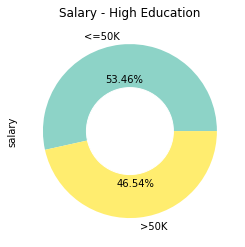

In [49]:

high_ed['salary'].value_counts().plot(kind='pie',
                                     colormap='Set3', autopct='%.2f%%')
plt.title('Salary - High Education')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


In [30]:
 # What percentage of people without advanced education make more than 50K?

lower_ed= df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
mask49 = len(lower_ed[lower_ed.salary == '>50K'])

percentage_lower = round(mask49/len(lower_ed) *100,1)
print('the percentage of people without advanced education make more than 50K: {}%'.format(percentage_lower))

the percentage of people without advanced education make more than 50K: 17.4%


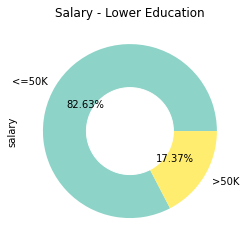

In [50]:
lower_ed['salary'].value_counts().plot(kind='pie',
                                     colormap='Set3', autopct='%.2f%%')
plt.title('Salary - Lower Education')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [72]:
# What is the minimum number of hours a person 
#works per week (hours-per-week feature)?

min_work_hours = df['hours-per-week'].min()
print('the minimum number of hours works per week: {}h'.format(min_work_hours))

the minimum number of hours works per week: 1h


In [58]:
# What percentage of the people who work the minimum number of hours per week 
#have a salary of >50K?
num_min_workers = df[df['hours-per-week'] == min_work_hours]
rich_percentage = round(len(num_min_workers[num_min_workers.salary == ">50K"])/ len(num_min_workers) *100,1)

print('number of works 1h/week: {}'.format(len(num_min_workers)))
print('\nnumber of works 1h/week who have a salary >50k: {}%'.format(rich_percentage))

number of works 1h/week: 20

number of works 1h/week who have a salary >50k: 10.0%


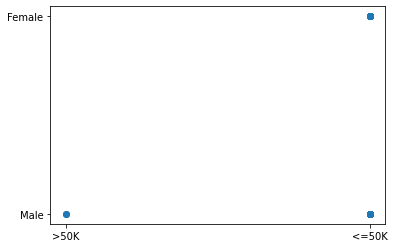

In [62]:
plt.scatter(num_min_workers['salary'], num_min_workers['sex'])

In [63]:
    # What country has the highest percentage of people that earn >50K?
    pais = df['native-country'].value_counts()
    paisR = df[df['salary'] == '>50K']['native-country'].value_counts()
  
    highest_earning_country = (paisR/pais *100).idxmax()
    highest_earning_country_percentage = round((paisR/pais *100).max(),1)

Text(25, 6000, 'Consider the number of employee as 100%\n the country with highest percentage \nof people that earn >50k is Iran!')

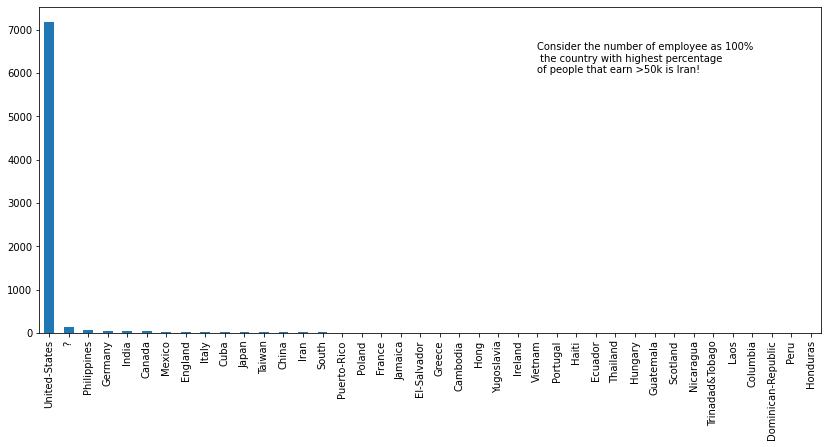

In [87]:
plt.figure(figsize=[14,6])
paisR.plot(kind='bar')
plt.annotate('Consider the number of employee as 100%\n the country with highest percentage \nof people that earn >50k is Iran!', xy=(4,3000), xytext=(25, 6000))

In [74]:
# Identify the most popular occupation for those who earn >50K in India.
pplI = df[(df['native-country'] == 'India') & (df['salary'] =='>50K')]
occp = pplI['occupation'].value_counts()
top_IN_occupation = occp.idxmax()

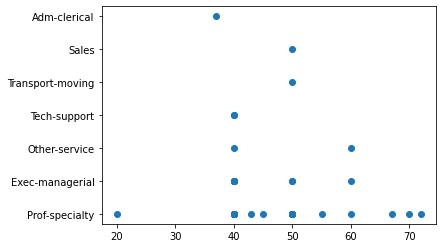

In [78]:
plt.scatter(pplI['hours-per-week'], pplI['occupation'])